![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [35]:
# Start your code here!
import pandas as pd
import numpy as np
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt


men = pd.read_csv('men_results.csv', index_col=0)
hhh_women = pd.read_csv('women_results.csv', index_col=0)

men.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly


## Test Normality

### Test 1

In [36]:
# Filter the data for the time range and tournament
men["date"] = pd.to_datetime(men["date"])
men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))]

hhh_women["date"] = pd.to_datetime(hhh_women["date"])
women_subset = hhh_women[(hhh_women["date"] > "2002-01-01") & (hhh_women["tournament"].isin(["FIFA World Cup"]))]

men_goals = men_subset["home_score"] + men_subset["away_score"]
women_goals = women_subset["home_score"] + women_subset["away_score"]

In [37]:
from scipy.stats import shapiro, anderson

# Shapiro-Wilk Test
stat, p_value = shapiro(men_goals)
if p_value > 0.05:
    print("Data is normal")
else:
    print("Data is not normal")

stat, p_value = shapiro(women_goals)
if p_value > 0.05:
    print("Data is normal")
else:
    print("Data is not normal")



Data is not normal
Data is not normal


### Test 2

In [46]:
# Anderson-Darling Test
# if (result.statistic) <  result.critical_values the data is normal at this specific result.significance_level
result = anderson(men_goals, dist='norm')
print(f"Test statistic: {round(result.statistic, 4)}")
print(f"Significance Levels: {result.significance_level}")
print(f"Critical Values: {result.critical_values}", '\n')

result = anderson(women_goals, dist='norm')
print(f"Test statistic: {round(result.statistic, 4)}")
print(f"Significance Levels: {result.significance_level}")
print(f"Critical Values: {result.critical_values}")

Test statistic: 9.1068
Significance Levels: [15.  10.   5.   2.5  1. ]
Critical Values: [0.57  0.649 0.779 0.909 1.081] 

Test statistic: 7.2168
Significance Levels: [15.  10.   5.   2.5  1. ]
Critical Values: [0.565 0.644 0.772 0.901 1.071]


### Test 3 (visualization)

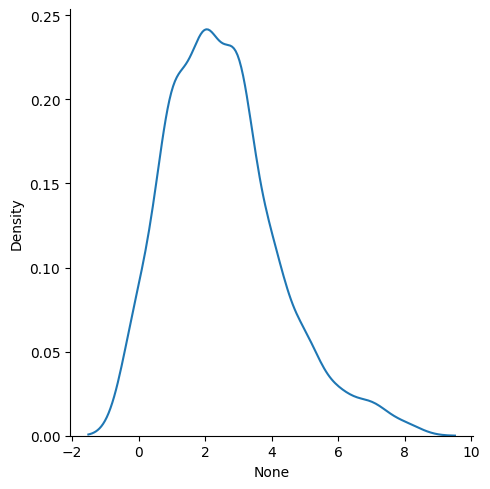

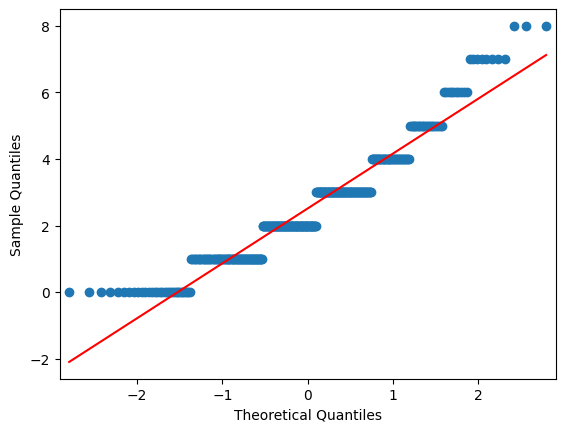

In [39]:
import statsmodels.api as sm

sns.displot(x=men_goals, kind="kde")
plt.show()

sm.qqplot(data=men_goals, line='s')
plt.show()

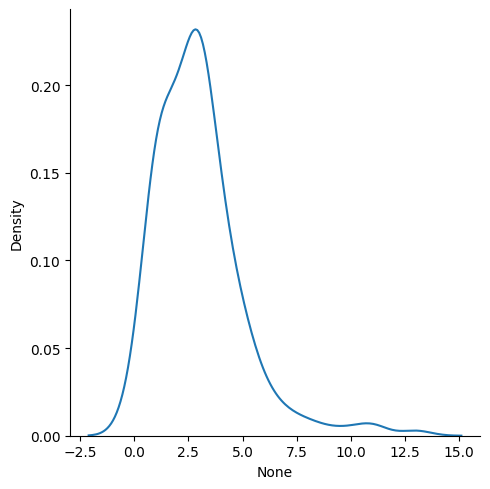

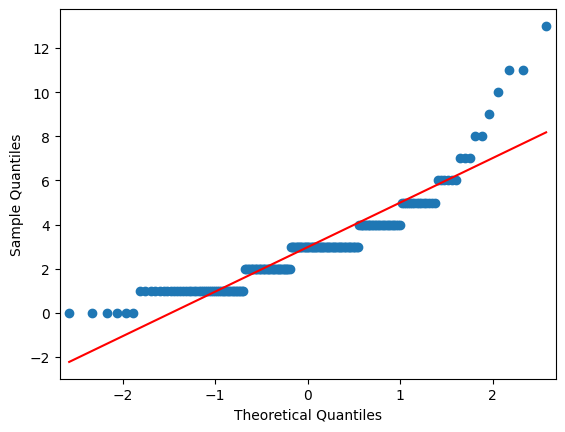

In [40]:
sns.displot(x=women_goals, kind="kde")
plt.show()

sm.qqplot(data=women_goals, line='s')
plt.show()

### Test 4 (visualization)

In [41]:
# Filter the data for the time range and tournament
men["date"] = pd.to_datetime(men["date"])
men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))]

hhh_women["date"] = pd.to_datetime(hhh_women["date"])
women_subset = hhh_women[(hhh_women["date"] > "2002-01-01") & (hhh_women["tournament"].isin(["FIFA World Cup"]))]


C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_18932\4192411449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_subset.loc[:,"goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_18932\4192411449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_subset.loc[:,"goals_scored"] = women_subset["home_score"] + women_subset["away_score"]


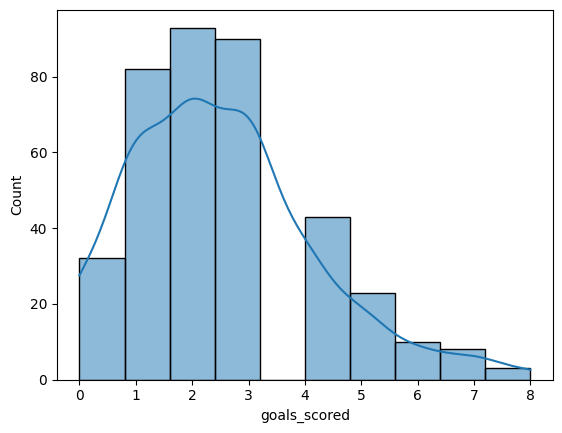

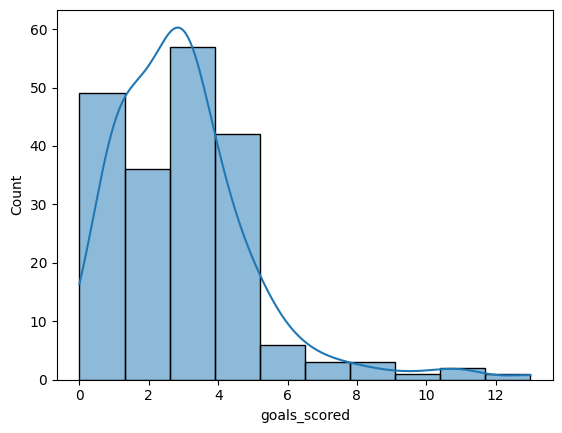

In [42]:
men_subset.loc[:,"goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset.loc[:,"goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

# Determine normality using histograms
# men_subset["goals_scored"].hist()
sns.histplot(data=men_subset, x="goals_scored", kde=True, bins=10)
plt.show()

sns.histplot(data=women_subset, x="goals_scored", kde=True, bins=10)
plt.show()


not normally distrbuted

## Wilcoxon-Mann-Whitney (non-parametric test similar to unpaired t-test)

In [43]:
men_subset["group"] = "men"
women_subset["group"] = "women"

both = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)

both.head()

C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_18932\3440698506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_subset["group"] = "men"
C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_18932\3440698506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_subset["group"] = "women"


,date,home_team,away_team,home_score,away_score,tournament,goals_scored,group
0,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3,women
1,2003-09-20,Norway,France,2,0,FIFA World Cup,2,women
2,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5,women
3,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6,women
4,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4,women


In [44]:
both_subset = both[["goals_scored", "group"]]
both_subset_wide = both_subset.pivot(columns="group", values="goals_scored")
both_subset_wide.head()

group,men,women
0,NaN,3.0
1,NaN,2.0
2,NaN,5.0
3,NaN,6.0
4,NaN,4.0


In [45]:
wmw_test = pingouin.mwu(x=both_subset_wide['women'],
                        y=both_subset_wide['men'],
                        alternative='greater')

wmw_test



,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,0.126901,0.563451


- > Significant p-value means we reject H0(The mean number of goals scored in women's international soccer matches is the same as men's.) in favour of the alternativa one H1(The mean number of goals scored in women's international soccer matches is greater than men's.)